# CS5242 Final Project
> Dataset and rules

### Rules
- No additional data for training is allowed **except the pretrained models over ImageNet**. You need to submit your code for verification.
- Any cheating will result in 0 score. For example, joining the competition with multiple accounts; or using additional data.
- The dataset can only be used for this Kaggle competition. Distribution or using it for other purposes is not allowed.
- Set the teamname with your student number and your name, e.g., `A01234X_Bob`; Once your group is merged, rename the group to `Group_ID`, e.g., `Group_01`.
- Penalty will be applied if you merge into the group after the deadline (13 Oct, 17:00) or using improper group name. 10% off per day.

**Deadline**: 3 Nov, 17:00 <br>
**Report deadline**: 10 Nov, 17:00 <br>

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import torch
import numpy as np
import pandas as pd
from skimage.io import imread
import torchvision.datasets as datasets
from os import path

import matplotlib.pyplot as plt
# for plotting figures (report)
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (3,3) # use larger for presentation
matplotlib.rcParams['font.size']= 9 # use 14 for presentation

In [3]:
# check for CUDA device and set default dtype
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
dtype = torch.float32
print(f'device: {device}\ndtype: {dtype}')

device: cuda
dtype: torch.float32


## Training Dataset (before Train/Val split)

In [6]:
# Paths to training dataset and labels (before Train/Val split)
train_label_path = path.join('./datasets','train_label.csv')
train_data_path = path.join('./datasets','train_image','train_image')

- There are three classes (types of labels): {0, 1, 2}
- Input images are 8-bit (per channel) RGB images

In [33]:
# Training dataset labels
Y_train_np = pd.read_csv(train_label_path).values
# We have three types of labels: {0, 1, 2},
# and 1164 samples (training dataset, before splitting into train/val data)
print('Y:',Y_train_np.shape)
print('Y classes:',np.unique(Y_train_np[:,1]))

Y: (1164, 2)
Y classes: [0 1 2]


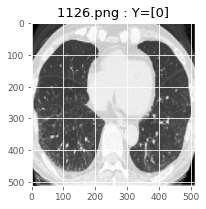

Check dtypes and size of sample input images:
 image # 1126-> shape(HxWxC): (512, 512, 3)| dtype: uint8
 image #  860-> shape(HxWxC): (512, 512, 3)| dtype: uint8
 image # 1130-> shape(HxWxC): (512, 512, 3)| dtype: uint8
 image # 1095-> shape(HxWxC): (512, 512, 3)| dtype: uint8
 image # 1044-> shape(HxWxC): (512, 512, 3)| dtype: uint8


In [39]:
np.random.seed(42) # RNG seed for consistency
ids = np.random.randint(0,Y_train_np.shape[0],size=(5,))

m=ids[0]
x_0 = imread(path.join(train_data_path,f'{m}.png'))
plt.imshow(x_0)
plt.title(f'{m}.png : Y={Y_train_np[Y_train_np[:,0]==m,1]}');
plt.show()
# dtype and shape of input images
print('Check dtypes and size of sample input images:')
for m in ids:
    x_0 = imread(path.join(train_data_path,f'{m}.png'))
    print(f' image #{m:5d}-> shape(HxWxC): {x_0.shape}| dtype: {x_0.dtype}') # HxWxC
# output was "shape(HxWxC): (512, 512, 3)| dtype: uint8"

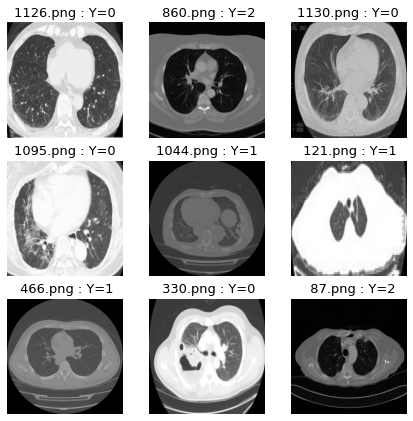

In [41]:
np.random.seed(42) # RNG seed for consistency

_, axs = plt.subplots(ncols=3,nrows=3,figsize=(7.2,7.2))
ids = np.random.randint(0,Y_train_np.shape[0],size=(axs.size,))
for ax, m in zip(axs.ravel(),ids):
    ax.imshow(imread(path.join(train_data_path,f'{Y_train_np[m,0]}.png')))
    ax.set_title(f'{m:4d}.png : Y={Y_train_np[m,1]}')
    ax.axis('off')
plt.show()

In [45]:
Y_train_np[1130,:]

array([1130,    0])

In [ ]:
# Training dataset images
X_train